In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
import pickle

In [3]:
import modelfunctions as mf

# Run a single simulation

In [11]:
# define parameters
numparticles=8
numsteps = 10 * 10**3

model = mf.simmodel(numparticles,numsteps,)  
model.dt = 0.1
model.savestep=1  # save the results this many steps
model.numsavesteps = np.floor(model.numsimsteps/model.savestep).astype(int) 
model.sigma_speed = 0.6  # this should be sigma_speed/sqrt(tau_speed) used to be 0.6

# these should have the length of the number of particles
model.socialweight = np.tile(0.5,numparticles)
model.sigma_turn = np.tile(0.6,numparticles)
model.sigma_turn[0] = 0.8
model.mu_s = np.ones(numparticles)  # the mean should be 1
model.speedsocialweight = 0.6 ## was 0.4
model.ignoresteps = np.tile([0,10**4],(numparticles,1))  # [how many steps to ignore social, how often to do it]
model.ignoresteps[0,0] = 800

model.socialmult = np.ones((numparticles,numparticles))
model.socialmult[:,4] = 0

### Arena size
model.xsize, model.ysize = [115,115]

model.r_repulsion = np.tile(3.657,numparticles)
model.r_repulsion[0] = 4.5
model.r_align = [8,8,8,8,8,8,8,8]
model.r_attract = model.r_align

vars(model)

{'numparticles': 8,
 'eta': 1,
 'mu_s': array([1., 1., 1., 1., 1., 1., 1., 1.]),
 'tau_turn': array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 'tau_speed': array([1., 1., 1., 1., 1., 1., 1., 1.]),
 'sigma_speed': 0.6,
 'sigma_turn': array([0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]),
 'socialweight': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'mean_mu_s': 1,
 'r_repulsion': array([4.5  , 3.657, 3.657, 3.657, 3.657, 3.657, 3.657, 3.657]),
 'r_align': [8, 8, 8, 8, 8, 8, 8, 8],
 'r_attract': [8, 8, 8, 8, 8, 8, 8, 8],
 'ignoresteps': array([[  800, 10000],
        [    0, 10000],
        [    0, 10000],
        [    0, 10000],
        [    0, 10000],
        [    0, 10000],
        [    0, 10000],
        [    0, 10000]]),
 'maxturnangle': 0.17453292519943295,
 'viewingzone': 3.141592653589793,
 'socialmult': array([[1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1.],
        [1.

In [12]:
# # run simulation
start = time.time()
# set speeps as a distribution
model.mu_s = 0.1 * np.random.randn(numparticles) + 1
model.mu_s = np.maximum(model.mu_s,0.1)  # set a minimum to avoid weird behavior

allparticles = mf.ptwsimulation(model,showprogress=False)
# get metrices for analyzing results
alldist, alldcoords_rotated = mf.dist_and_dcoords(allparticles,model)


print('time to run simulation:', np.round(time.time()-start,2), 'sec')

time to run simulation: 1.92 sec


# Simple plots of results


the numpy array 'allparticles' contains results stored as: [timestep, particle, quantity] The different quantities are: x, y, vx, vy, spd, ang, angvel, stopgo, state

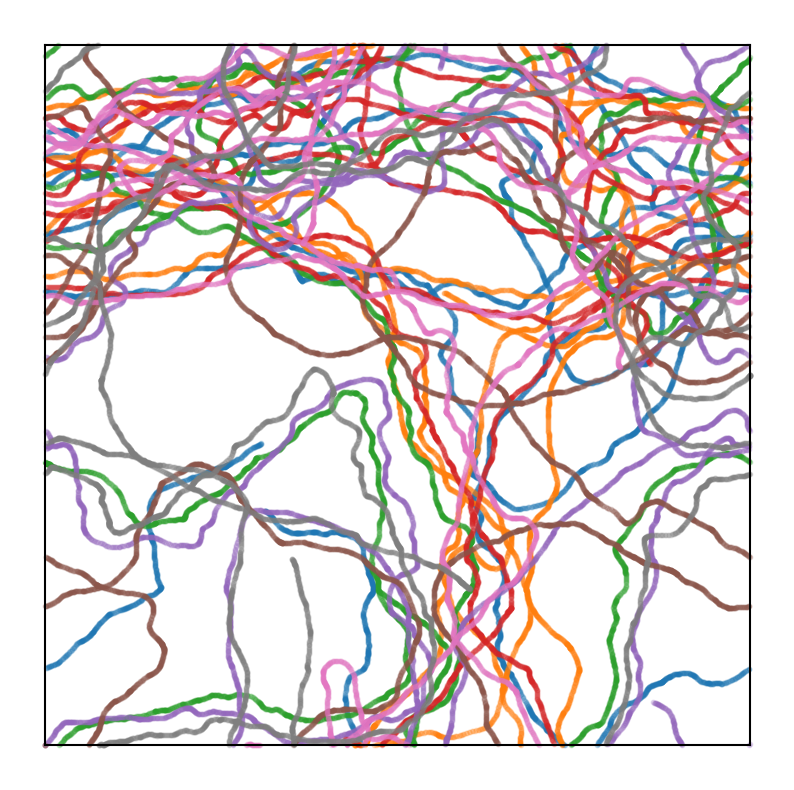

In [13]:
# to make code below easier, set these variables
snscolors = sns.color_palette()
numparticles = model.numparticles
xsize, ysize, savestep, dt = model.xsize, model.ysize, model.savestep, model.dt
ind_x, ind_y, ind_vx, ind_vy, ind_spd, ind_ang, ind_angvel, ind_stopgo, ind_state = np.arange(9)
wallsegments=np.array([ [[0,0],[xsize,0]], [[xsize,0],[xsize,ysize]], [[xsize,ysize],[0,ysize]], [[0,ysize],[0,0]] ])
showlen=np.floor(100/savestep).astype(int)

# plot the whole simulated trajectories
f,ax = plt.subplots(1,1)
f.set_size_inches(10,10)
for k in range(len(wallsegments)):
    ax.plot(wallsegments[k,:,0],wallsegments[k,:,1],'k')  
ax.axis('off')
for i in range(numparticles):
    ax.scatter(allparticles[:,i,0],allparticles[:,i,1],color=snscolors[i],alpha=0.2,s=10)